In [ ]:
'''This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model. 
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the 
results of your machine learning model.'''

In [46]:
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv(r"C:\Users\suhai\Downloads\Fraud.csv")

In [48]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
missing_values=data.isnull().sum()
missing_values


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [51]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [52]:
data = data.dropna()

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [54]:
data['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

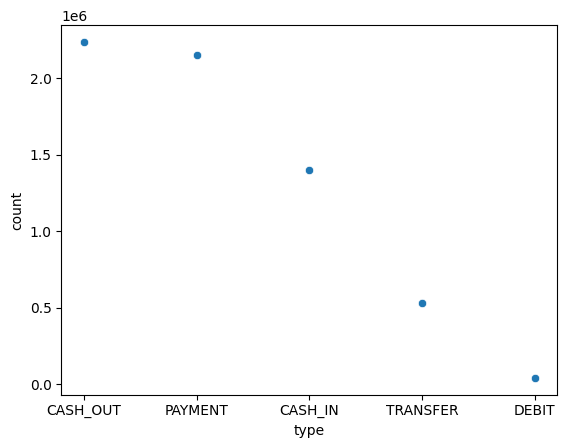

In [55]:
figure = figsize=(8,6)
sns.scatterplot(data['type'].value_counts() )

In [56]:
data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [57]:
data1 = ['amount',	'oldbalanceOrg',	'newbalanceOrig'	,'oldbalanceDest',	'newbalanceDest'	,'isFraud'	,'isFlaggedFraud']

In [58]:
data[data1] = data[data1].apply(pd.to_numeric)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [59]:
data2 = data.drop(columns = ['nameOrig','nameDest'],axis = 1)

In [60]:
data2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [61]:
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [62]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [63]:
#so in above it shows 0 is not fraud and 1 is fraud and in them only 16 are flagged 
fraudulent_transactions = data2[data2['isFraud'] == 1]
fraudulent_transactions.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,2806.00,0.0,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,20128.00,0.0,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,20128.00,0.0,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,0.00,0.0,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,1277212.77,0.0,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,1277212.77,0.0,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,35063.63,0.0,0.0,0.00,1,0


In [64]:
flagged_transacrtions = data2[data2['isFlaggedFraud']==1]
flagged_transacrtions

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,1343002.08,1343002.08,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,536624.41,536624.41,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,4892193.09,4892193.09,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,19585040.37,19585040.37,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,19585040.37,19585040.37,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,353874.22,353874.22,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,2542664.27,2542664.27,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,10399045.08,10399045.08,0.0,0.0,1,1


In [65]:
#in the above table its shown that all the flagged transaxtions are being TRANSFERED and the amount is more than 200000
#i even believe that flaggeed column is  useless because there are only 16 rows out  of 1 million rows

In [66]:
fraudulent_transactions['type'].unique()
#its said that only ['TRANSFER', 'CASH_OUT'] are used for fraud

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [67]:
fraudulent_transactions[fraudulent_transactions['type']=='CASH_OUT']


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,20128.00,0.0,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,0.00,0.0,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,1277212.77,0.0,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,63416.99,0.0,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,1258818.82,0.0,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0


In [68]:
data2['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [69]:
data2['type'].replace({'PAYMENT':1,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5},inplace = True)

C:\Users\suhai\AppData\Local\Temp\ipykernel_19508\1683556467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['type'].replace({'PAYMENT':1,'TRANSFER':2, 'CASH_OUT':3, 'DEBIT':4, 'CASH_IN':5},inplace = True)
C:\Users\suhai\AppData\Local\Temp\ipykernel_19508\1683556467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [70]:
data2.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1,0
3,1,3,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [71]:
x = data2.drop(['isFraud','isFlaggedFraud'], axis =1)
x.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [72]:
x.shape

(6362620, 7)

In [73]:
y = data2.drop(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest','isFlaggedFraud'], axis=1)
y.columns

Index(['isFraud'], dtype='object')

In [77]:
# the dataset is very large so we are gonna use Neural networks model, large dataset and computational resources, and need to capture intricate patterns.
#Requires large amounts of data and tuning, can be prone to overfitting.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [79]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\suhai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
# Train the model
model.fit(x_train, y_train, epochs=7, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Make predictions
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int)

# Print predictions
print(y_pred[:10])

Epoch 1/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 127s 994us/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 2/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 127s 996us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 3/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 127s 999us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 4/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 124s 970us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 5/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 124s 975us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 6/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 125s 984us/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 7/7
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 124s 974us/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0047
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 22s 547u

In [ ]:
'''1. Data cleaning including missing values, outliers and multi-collinearity. 
        -There are no much missing values in the dataset, evnen if we find some we could delete thoes rows and columns 
        -While looking for ussless data i found that "nameOrig" and "nameDest". 
        -And then even the isFlaggedFraud
        -in the above table its shown that all the flagged transaxtions are being TRANSFERED and the amount is more than 200000
        -i even believe that flaggeed column is  useless because there are only 16 rows out  of 1 million rows
    2. Describe your fraud detection model in elaboration. 
        -The model could be a neural network as previously discussed, or another suitable model like Random Forest or Gradient Boosting.
            The choice will depend on the dataset's characteristics.
        -The model's architecture, input features, activation functions, and optimization process will be detailed, emphasizing how the model 
            distinguishes between fraudulent and legitimate transactions.
    3. How did you select variables to be included in the model?
        - in this dataset the  variables like 'amount',	'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest' are for input 
            values that needed to be preddicted as if the flagged column and nmaes of recipeent and the customer are useless
        - the predicted output data needed is 'IsFRAUD'.
    4. Demonstrate the performance of the model by using best set of tools.    
        -Cross-Validation: To ensure robustness, cross-validation will be employed to evaluate the model on different subsets of the data.
        - we have used loss='binary_crossentropy', metrics=['accuracy'],  epochs=7, loss, accuracy
    5. Key Factors Predicting Fraudulent Customers:
        -The analysis will reveal factors such as unusually high transaction amounts, frequent transfers to the same account, or significant changes 
            in account balance as potential indicators of fraud.
    6. Do these factors make sense? If yes, How? If not, How not?    
        - the factors describe about the transaction of the data, which explian whether these factors align with known behaviors of fraudulent activity 
            (e.g., draining accounts, using intermediaries).
    7. What kind of prevention should be adopted while company update its infrastructure?
        - I guess that the advanced authentication, real-time transaction monitoring, and anomaly detection systems should be improved. and 
            Regular training on fraud detection and the importance of maintaining system security.
    8. Assuming these actions have been implemented, how would you determine if they work?
        -Continuously gather feedback from the system and stakeholders to refine and improve the infrastructure.Highly correlated variables may be dropped 
            or combined to reduce redundancy.
        

    